# Climate Anxiety in Youth and Perception of Government
## Question/Hypothesis: 
**Response Variable:** Q1 - I am worried that climate change threatens people and the planet.

**Predictors:** language, country, region, age, sex, Q2-Q8

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
import scipy.stats as stats
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
import graphviz
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import r2_score

In [2]:
df = pd.read_spss('Climate Anxiety-3.SAV')
df.head()

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South,0.955127
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,NaN,NaN,NaN,NaN,Metro Luzon Urban Beltway/ North Luzon Agribus...,NaN,NaN,NaN,NaN,0.649680
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915752
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,NaN,NaN,West India,NaN,NaN,NaN,NaN,NaN,NaN,1.183360


## Data Exploration

In [3]:
df.columns, len(df.columns)

(Index(['Respondent_Serial', 'language', 'country', 'D1', 'D2', 'D3', 'Q1',
        'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
        'Q2_10', 'Q2_11', 'Q2_12', 'Q2_13', 'Q2_14', 'Q3', 'Q4_1', 'Q4_2',
        'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5', 'Q6', 'Q7_1', 'Q7_2',
        'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q7_9', 'Q8_1', 'Q8_2',
        'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'yyyymmdd',
        'AgeGender', 'regionAustralia', 'regionUS', 'regionUK', 'regionIndia',
        'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal',
        'regionBrazil', 'regionFrance', 'weight'],
       dtype='object'),
 62)

In [4]:
df.dtypes

Respondent_Serial     float64
language             category
country              category
D1                    float64
D2                   category
                       ...   
regionFinland        category
regionPortugal       category
regionBrazil         category
regionFrance         category
weight                float64
Length: 62, dtype: object

In [5]:
df['Q1'].value_counts()

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

In [6]:
df['Q1'].value_counts(normalize=True)

Q1
very           0.327142
extremely      0.274665
moderately     0.246447
a little       0.103735
not worried    0.048011
Name: proportion, dtype: float64

In [7]:
# Count nan or 'Prefer not to say' values in the Q1 column
df['Q1'].isna().sum(), df['Q1'].str.contains('Prefer not to say').sum()

(148, 0)

In [8]:
df[df['Q1'].isna()]

,Respondent_Serial,language,country,D1,D2,D3,Q1,Q2_1,Q2_2,Q2_3,...,regionUS,regionUK,regionIndia,regionNigeria,regionPhilippines,regionFinland,regionPortugal,regionBrazil,regionFrance,weight
68,114.0,English,Australia,21.0,woman,Australia: Tasmania,NaN,no,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739153
162,232.0,English,United Kingdom,21.0,woman,United Kingdom: North,NaN,no,yes,no,...,NaN,North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957871
209,290.0,English,Australia,21.0,woman,Australia: New South Wales,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771648
213,296.0,English,India,23.0,man,India: North India,NaN,no,no,no,...,NaN,NaN,North India,NaN,NaN,NaN,NaN,NaN,NaN,0.814742
230,321.0,English,Australia,21.0,man,Australia: Victoria,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9807,14903.0,English,Australia,25.0,man,Australia: Western Australia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.145472
9853,15041.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,no,no,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9862,15057.0,English,Nigeria,21.0,woman,Nigeria: South West,NaN,no,yes,yes,...,NaN,NaN,NaN,South West,NaN,NaN,NaN,NaN,NaN,0.433441
9867,15067.0,English,Nigeria,23.0,man,Nigeria: South South,NaN,yes,no,yes,...,NaN,NaN,NaN,South South,NaN,NaN,NaN,NaN,NaN,0.348822


In [9]:
df['AgeGender'].unique(), len(df['AgeGender'])

(['Men 21-25', 'Women 21-25', 'Women 16-20', 'Men 16-20']
 Categories (4, object): ['Men 16-20', 'Men 21-25', 'Women 16-20', 'Women 21-25'],
 10000)

In [10]:
# Count the number of men and women in the dataset
df['AgeGender'].value_counts()

AgeGender
Women 21-25    3153
Men 21-25      2900
Men 16-20      1994
Women 16-20    1953
Name: count, dtype: int64

## Data Cleaning

#### Replace columns with more descriptive names
The original convention used to describe the columns is not very descriptive. We will replace the column names with more descriptive names.

The new convention will be the Question number (Q1, Q2, Q3, etc.) followed by a descriptive word from the poll associated with that question/subquestion.

For example, Q2 is "Does climate change make you feel any of the following?" with sad being one of the options, and the responses being yes, no, and prefer not to say. The new column name will be Q2_sad and will contain the values yes, not, or nan.

In [11]:
columns = ['Repondent_Serial', 'language', 'country', 'age', 'sex', 'country:region', 
           'Q1', 
           'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
           'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed', 'Q2_despair',
           'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 
           'Q3', 
           'Q4_hesitant', 'Q4_doomed','Q4_frightening', 'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed',
           'Q5', 
           'Q6', 
           'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying',
           'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected',
           'yyyymmdd','AgeGender', 
           'regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance', 'weight']

In [12]:
df.columns = columns
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'regionAustralia', 'regionUS',
        'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines',
        'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance',
        'weight'],
       dty

In [13]:
# Drop all of the region columns
# Make a new region column that splits the country:region column by ':'
df['region'] = df['country:region'].str.split(':').str[1]
df = df.drop(columns=['regionAustralia', 'regionUS', 'regionUK', 'regionIndia', 'regionNigeria', 'regionPhilippines', 'regionFinland', 'regionPortugal', 'regionBrazil', 'regionFrance'])
df.columns, len(df.columns)

(Index(['Repondent_Serial', 'language', 'country', 'age', 'sex',
        'country:region', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious',
        'Q2_afraid', 'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed',
        'Q2_hurt', 'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
        'Q2_indifferent', 'Q3', 'Q4_hesitant', 'Q4_doomed', 'Q4_frightening',
        'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
        'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
        'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
        'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
        'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
        'Q8_protected', 'yyyymmdd', 'AgeGender', 'weight', 'region'],
       dtype='object'),
 53)

##### Note: Drop all rows with missing response variable values

In [14]:
df = df.dropna(subset=['Q1'])

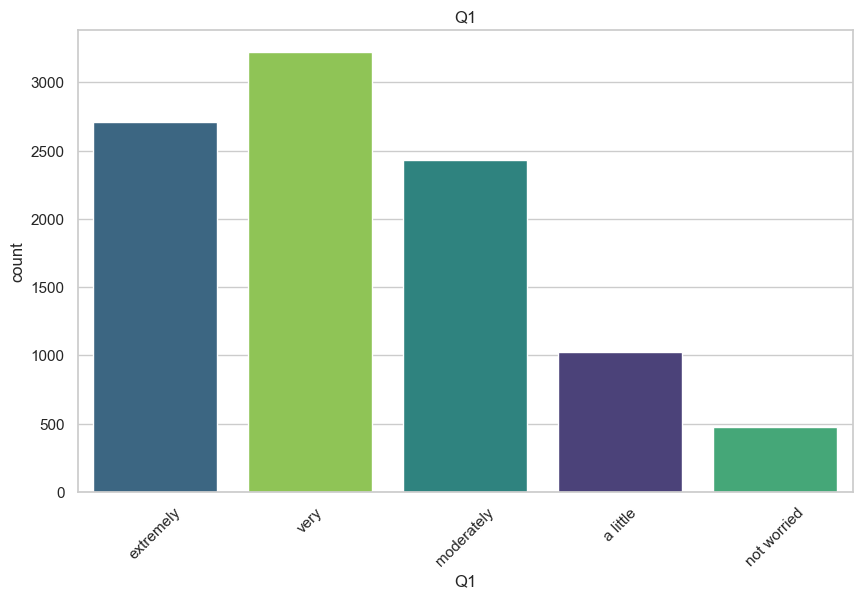

In [15]:
order = ['extremely', 'very', 'moderately', 'a little', 'not worried']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
# Sort by the value counts of the Q1 column
# sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=df['Q1'].value_counts().sort_values(ascending=False).index)
sns.countplot(x='Q1', data=df, hue='Q1', palette='viridis', legend=False, order=order)
plt.xticks(rotation=45)
plt.title('Q1')
plt.show()

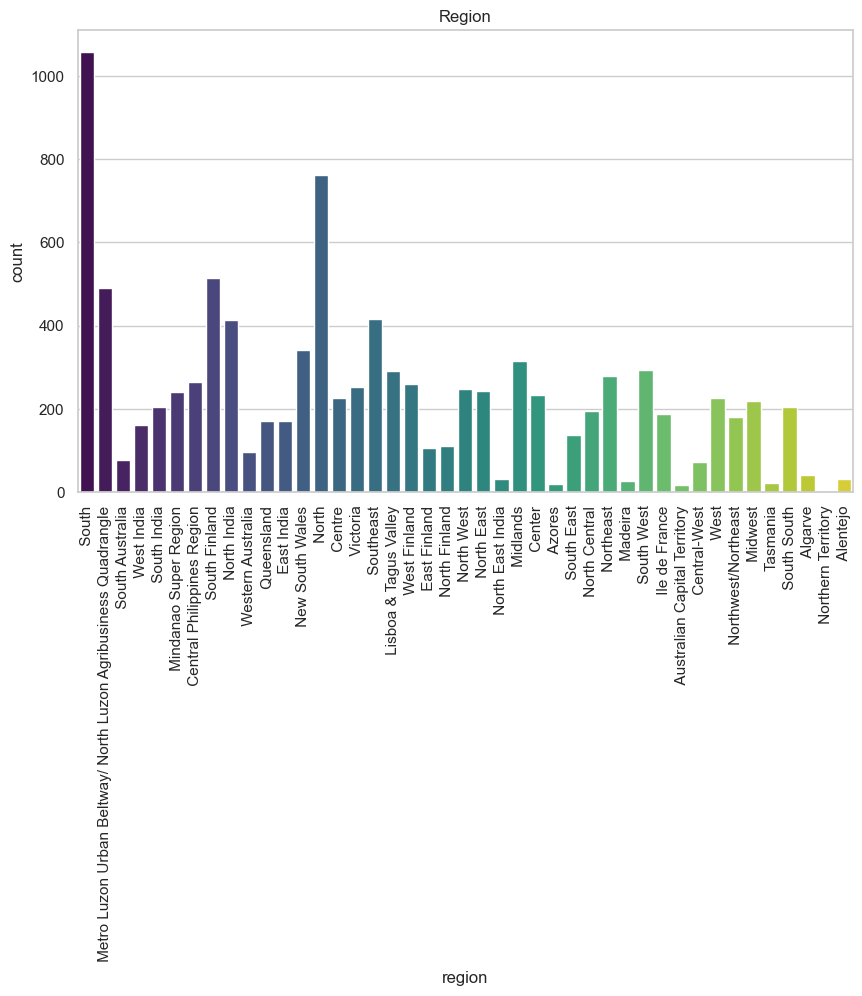

In [16]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Region')
plt.show()

In [17]:
# Find all rows with no null values
df[df.notnull().any(axis=1)]

,Repondent_Serial,language,country,age,sex,country:region,Q1,Q2_sad,Q2_helpless,Q2_anxious,...,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,yyyymmdd,AgeGender,weight,region
0,25.0,French,France,22.0,man,France: South,extremely,yes,yes,yes,...,not at all,extremely,not at all,moderately,NaN,not at all,20210518.0,Men 21-25,0.955127,South
1,26.0,English,Philippines,25.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,moderately,moderately,moderately,moderately,moderately,moderately,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
2,27.0,English,Philippines,24.0,woman,Philippines: Metro Luzon Urban Beltway/ North ...,extremely,yes,yes,yes,...,not at all,moderately,not at all,moderately,moderately,not at all,20210518.0,Women 21-25,0.649680,Metro Luzon Urban Beltway/ North Luzon Agribu...
3,28.0,English,Australia,20.0,woman,Australia: South Australia,a little,no,yes,no,...,not at all,not at all,not at all,not at all,not at all,not at all,20210518.0,Women 16-20,0.915752,South Australia
4,29.0,English,India,18.0,woman,India: West India,extremely,no,no,no,...,extremely,very,extremely,very,extremely,extremely,20210518.0,Women 16-20,1.183360,West India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15413.0,English,Australia,21.0,woman,Australia: Tasmania,extremely,yes,yes,yes,...,a little,extremely,a little,extremely,a little,not at all,20210607.0,Women 21-25,0.739153,Tasmania
9996,15415.0,English,Australia,25.0,woman,Australia: New South Wales,very,yes,yes,yes,...,a little,moderately,not at all,a little,not at all,a little,20210607.0,Women 21-25,0.771648,New South Wales
9997,15416.0,English,Australia,19.0,woman,Australia: New South Wales,extremely,yes,yes,yes,...,not at all,not at all,not at all,not at all,not at all,not at all,20210607.0,Women 16-20,0.869418,New South Wales
9998,15417.0,English,Australia,21.0,woman,Australia: Western Australia,very,yes,yes,yes,...,moderately,moderately,a little,very,moderately,a little,20210607.0,Women 21-25,0.821953,Western Australia


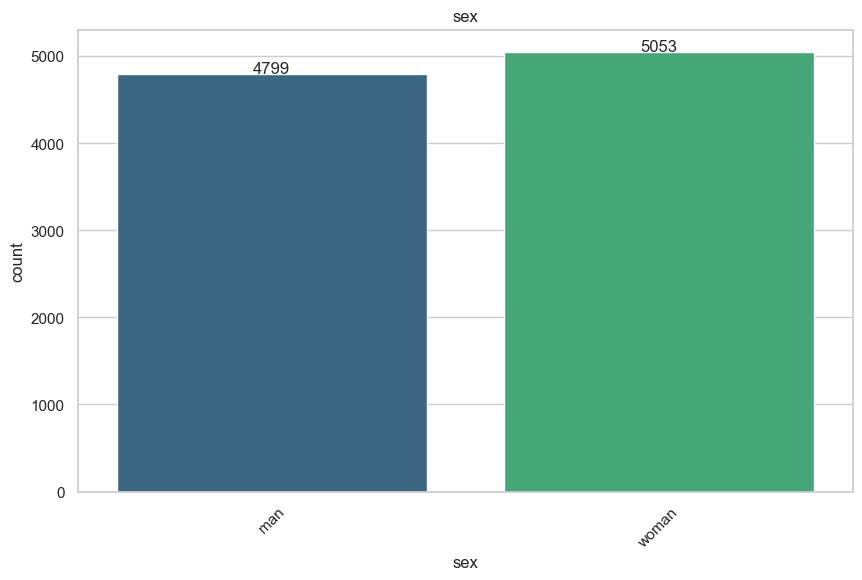

In [18]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'sex' column to a manageable number
top_sex = df['sex'].value_counts().nlargest(10).index
df_limited = df[df['sex'].isin(top_sex)]

sns.countplot(x='sex', data=df_limited, hue='sex', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('sex')

for i, sex in enumerate(df_limited['sex'].unique()):
    sex_count = df_limited['sex'].value_counts()[sex]
    plt.text(i, sex_count, f'{sex_count}', ha='center')

plt.show()

##### Note: Show most populus regions in the dataset

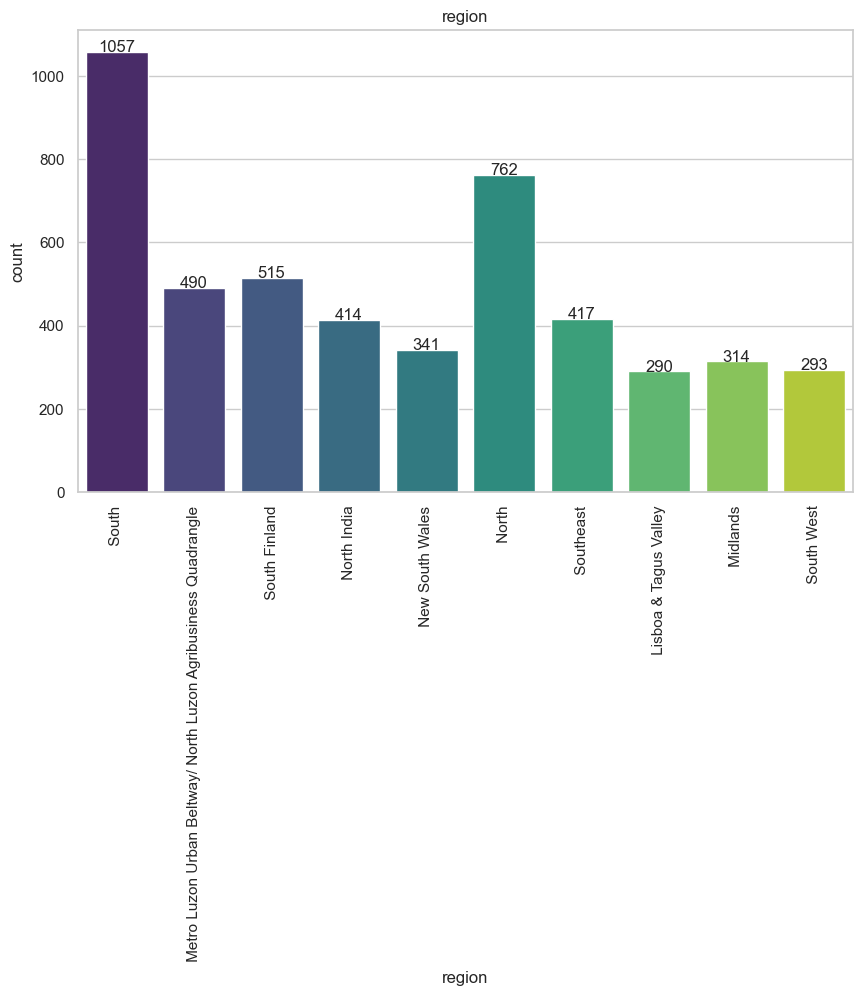

In [19]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

# Limit the number of unique values in the 'region' column to a manageable number
top_region = df['region'].value_counts().nlargest(10).index
df_limited = df[df['region'].isin(top_region)]

sns.countplot(x='region', data=df_limited, hue='region', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('region')

for i, region in enumerate(df_limited['region'].unique()):
    region_count = df_limited['region'].value_counts()[region]
    plt.text(i, region_count, f'{region_count}', ha='center')

plt.show()

In [20]:
# drop unused variables 
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight']) # not the same as the X used in data analysis

for column in X.columns:
    summary = X[column].describe()

    print(f'{column}') 
    print(summary)

age
count    9852.000000
mean       21.241677
std         2.550188
min        16.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        25.000000
Name: age, dtype: float64
sex
count      9852
unique        2
top       woman
freq       5053
Name: sex, dtype: object
Q1
count     9852
unique       5
top       very
freq      3223
Name: Q1, dtype: object
Q2_sad
count     9735
unique       2
top        yes
freq      6661
Name: Q2_sad, dtype: object
Q2_helpless
count     9711
unique       2
top        yes
freq      5073
Name: Q2_helpless, dtype: object
Q2_anxious
count     9720
unique       2
top        yes
freq      6179
Name: Q2_anxious, dtype: object
Q2_afraid
count     9740
unique       2
top        yes
freq      6744
Name: Q2_afraid, dtype: object
Q2_optimistic
count     9636
unique       2
top         no
freq      6596
Name: Q2_optimistic, dtype: object
Q2_angry
count     9707
unique       2
top        yes
freq      5704
Name: Q2_angry, dtype: object
Q2_guilty


In [21]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

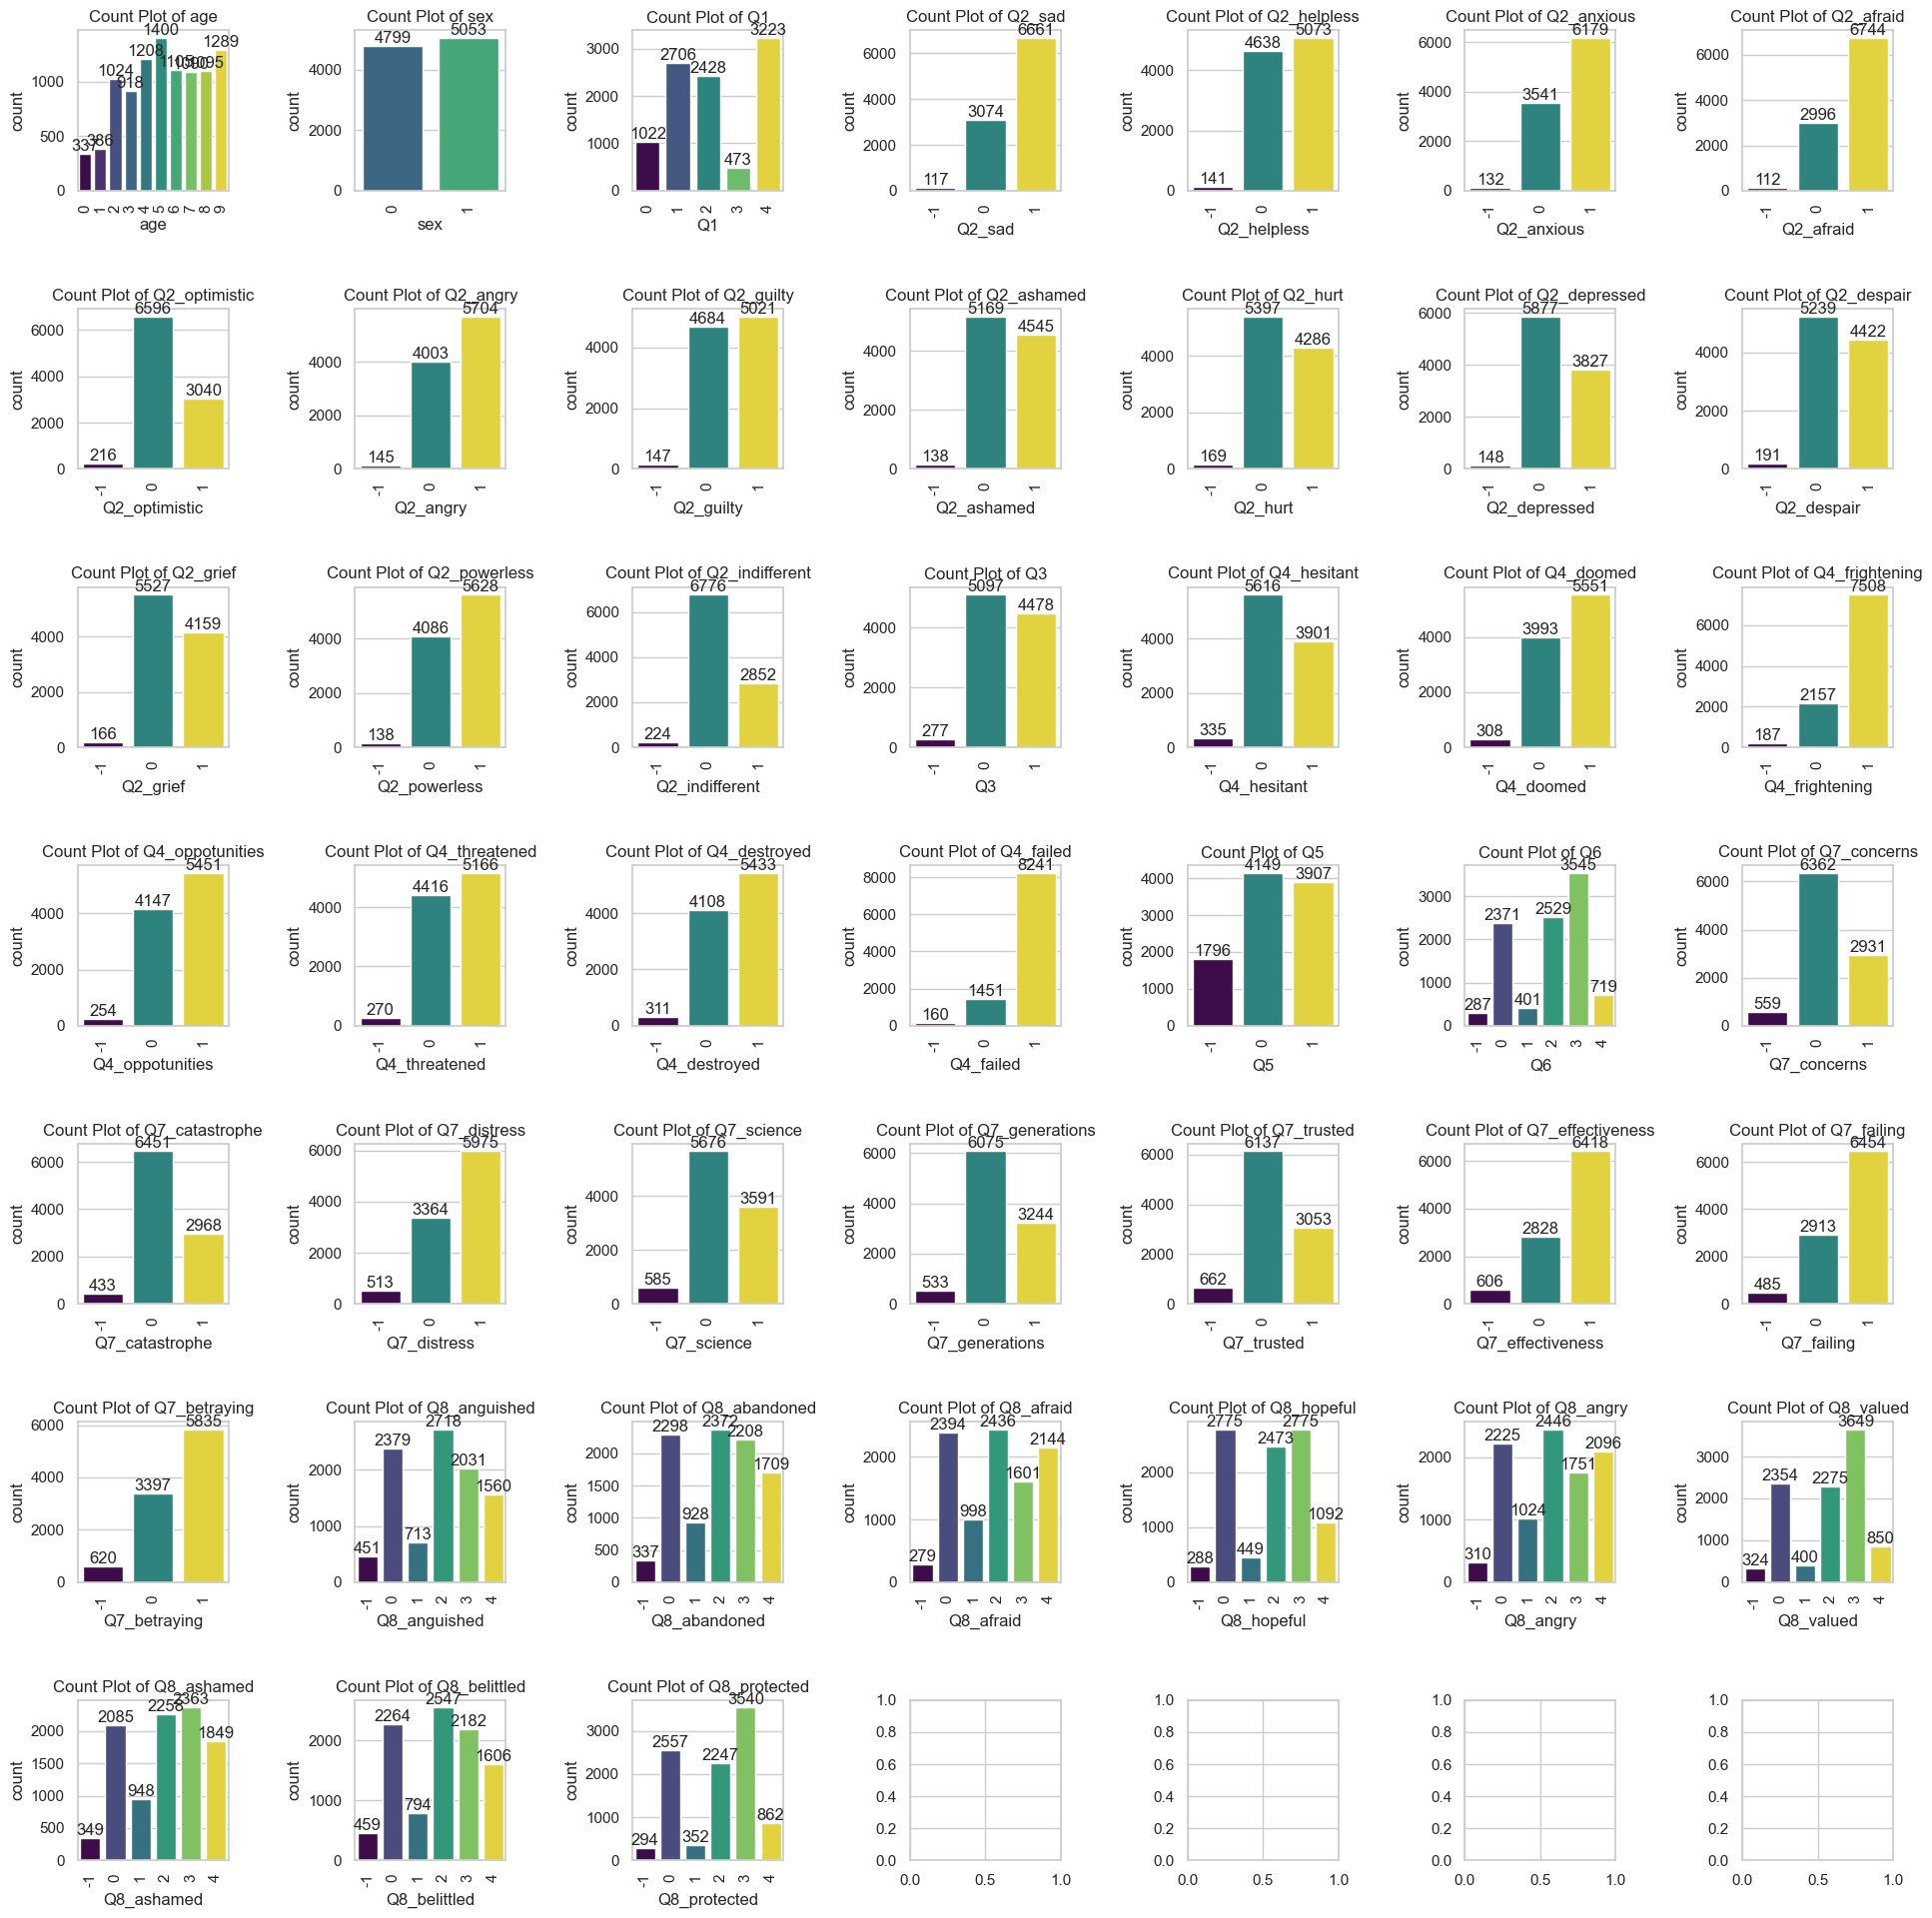

In [22]:
sns.set_theme(style='whitegrid')

# Calculate the number of rows and columns for the subplots
num_columns = len(X.columns)
num_rows = int(np.ceil(np.sqrt(num_columns)))
num_cols = int(np.ceil(num_columns / num_rows))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(X.columns):
    ax = sns.countplot(x=column, data=X, hue=column, palette='viridis', legend=False, ax=axes[i])
    ax.set_title(f'Count Plot of {column}')
    ax.tick_params(axis='x', rotation=90)
    
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height,
                s=int(height),
                ha='center',
                va='bottom'
            )

plt.tight_layout(pad=3.0)
plt.show()

In [23]:
# Correlations

correlations = X.corr()
q1_correlations = correlations['Q1']
print(q1_correlations.sort_values(ascending=True))

# Individually, none of the variables that we are using seem to have any practically significant correlations with Q1. 
# The variable with the Q1 correlation with the largest magnitude is Q2_afraid, with a correlaiton of .082.

Q3                 -0.052752
Q2_depressed       -0.043321
Q2_indifferent     -0.041624
Q7_generations     -0.033514
Q4_hesitant        -0.032059
Q8_anguished       -0.018706
Q7_catastrophe     -0.018640
Q8_valued          -0.018375
Q2_hurt            -0.018183
Q2_despair         -0.015164
Q7_concerns        -0.014277
Q2_grief           -0.013166
sex                -0.012853
Q4_destroyed       -0.012412
Q4_doomed          -0.011747
Q8_protected       -0.010024
Q2_optimistic      -0.009904
Q7_science         -0.009339
Q7_trusted         -0.007562
Q5                 -0.007550
Q7_effectiveness   -0.005059
Q4_threatened      -0.003759
Q8_belittled       -0.003128
Q8_angry           -0.002194
age                -0.000428
Q4_oppotunities     0.001681
Q8_abandoned        0.002115
Q7_failing          0.005178
Q7_betraying        0.005380
Q8_hopeful          0.009866
Q2_helpless         0.011044
Q8_ashamed          0.011289
Q7_distress         0.011815
Q8_afraid           0.019446
Q6            

## Data Analysis
Try data anaylsis with different models. Try with and without non-numeric columns (like language, country).

### Models without non-numeric columns:
#### Variables + Train and Test Split

In [24]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'Q1'])
y = df['Q1']

In [25]:
before = X['sex'].value_counts()

In [26]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,weight
0,6,0,1,1,1,1,1,1,1,1,...,2,4,4,3,1,3,2,-1,3,73
1,9,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,11
2,8,1,1,1,1,1,0,1,1,1,...,2,2,2,3,2,3,2,2,3,11
3,4,1,0,1,0,0,0,0,1,0,...,2,3,3,3,3,3,3,3,3,68
4,2,1,0,0,0,1,1,0,0,1,...,4,4,4,1,4,1,4,1,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,0,1,1,1,...,4,0,1,0,1,0,1,0,3,29
9996,9,1,1,1,1,1,0,1,0,1,...,0,4,2,0,2,3,0,3,0,38
9997,3,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,64
9998,5,1,1,1,1,1,0,1,1,1,...,0,0,4,2,2,0,4,2,0,56


In [27]:
after = X['sex'].value_counts()
before.values == after.values

array([ True,  True])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
category_mapping = {
    'extremely': 4,
    'very': 3,
    'moderately': 2,
    'a little': 1,
    'not worried': 0,
    'prefer not to say': -1,
    'yes': 1,
    'no': 0
}

In [30]:
y_train = y_train.map(category_mapping)

In [31]:
y_test = y_test.map(category_mapping)

In [32]:
# All columns that start with Q6 or Q8 will be in df_ordinal
X_ordinal = X.filter(regex='Q6|Q8')
X_ordinal.columns, len(X_ordinal.columns)

(Index(['Q6', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid', 'Q8_hopeful',
        'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled', 'Q8_protected'],
       dtype='object'),
 10)

In [33]:
X_nominal = X.filter(regex='Q2|Q3|Q4|Q5|Q7')
X_nominal.columns, len(X_nominal.columns)

(Index(['Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid', 'Q2_optimistic',
        'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt', 'Q2_depressed',
        'Q2_despair', 'Q2_grief', 'Q2_powerless', 'Q2_indifferent', 'Q3',
        'Q4_hesitant', 'Q4_doomed', 'Q4_frightening', 'Q4_oppotunities',
        'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5', 'Q7_concerns',
        'Q7_catastrophe', 'Q7_distress', 'Q7_science', 'Q7_generations',
        'Q7_trusted', 'Q7_effectiveness', 'Q7_failing', 'Q7_betraying'],
       dtype='object'),
 32)

#### Precurssor: KNN Model (K-Nearest Neighbors)

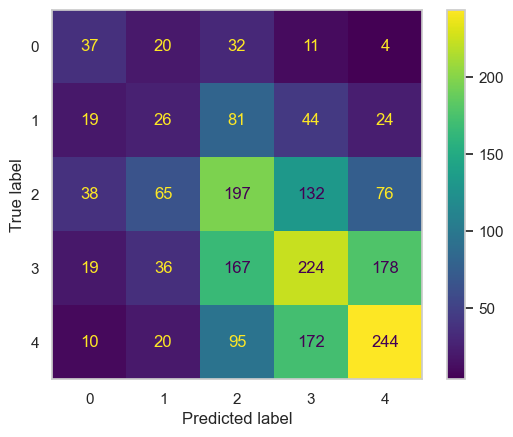

In [34]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [35]:
accuracy_score(y_test, y_pred)

0.3693556570268899

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.36      0.33       104
           1       0.16      0.13      0.14       194
           2       0.34      0.39      0.36       508
           3       0.38      0.36      0.37       624
           4       0.46      0.45      0.46       541

    accuracy                           0.37      1971
   macro avg       0.33      0.34      0.33      1971
weighted avg       0.37      0.37      0.37      1971



#### Model 1: Oridnal/Nominal Logistic Regression

##### Nominal

In [37]:
nom_X_train, nom_X_test, nom_y_train, nom_y_test = train_test_split(X_nominal, y, test_size=0.2, random_state=42)

# Nominal logistic regression
nominal_logistic = LogisticRegression(max_iter=1000)
nominal_logistic.fit(nom_X_train, nom_y_train)

nominal_logistic.score(nom_X_test, nom_y_test)

0.44951801116184675

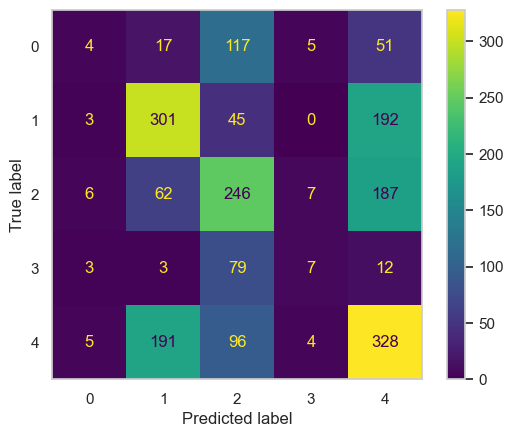

In [38]:
# nominal confusion matrix
nom_y_pred = nominal_logistic.predict(nom_X_test)
nom_cm = confusion_matrix(nom_y_test, nom_y_pred)
labels = [category_mapping[key] for key in sorted(category_mapping, key=category_mapping.get) if key in nom_y_test.unique()]
nom_disp = ConfusionMatrixDisplay(confusion_matrix=nom_cm, display_labels=labels)
nom_disp.plot()
plt.grid(False)
plt.show()

In [39]:
print(classification_report(nom_y_test, nom_y_pred))

              precision    recall  f1-score   support

    a little       0.19      0.02      0.04       194
   extremely       0.52      0.56      0.54       541
  moderately       0.42      0.48      0.45       508
 not worried       0.30      0.07      0.11       104
        very       0.43      0.53      0.47       624

    accuracy                           0.45      1971
   macro avg       0.37      0.33      0.32      1971
weighted avg       0.42      0.45      0.42      1971



##### Check Class Distribution

In [40]:
label_counts = y.value_counts()
label_counts

Q1
very           3223
extremely      2706
moderately     2428
a little       1022
not worried     473
Name: count, dtype: int64

##### Resampling Techniques
Resample the data to balance the classes.

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

##### Model Tuning: 

Experiment with different model complexities and regularization parameters.

In [42]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [43]:
print(grid.best_params_)

{'C': 10}


In [44]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.14      0.22       104
           1       0.21      0.04      0.06       194
           2       0.45      0.52      0.48       508
           3       0.43      0.51      0.47       624
           4       0.52      0.55      0.54       541

    accuracy                           0.46      1971
   macro avg       0.41      0.35      0.35      1971
weighted avg       0.44      0.46      0.44      1971



##### Ordinal

In [45]:
ordinal_X_train, ordinal_X_test, ordinal_y_train, ordinal_y_test = train_test_split(X_ordinal, y, test_size=0.2, random_state=42)

# Ordinal logistic regression
ordinal_logistic = LogisticRegression(max_iter=1000)
ordinal_logistic.fit(ordinal_X_train, ordinal_y_train)

ordinal_logistic.score(ordinal_X_test, ordinal_y_test)

0.3181126331811263

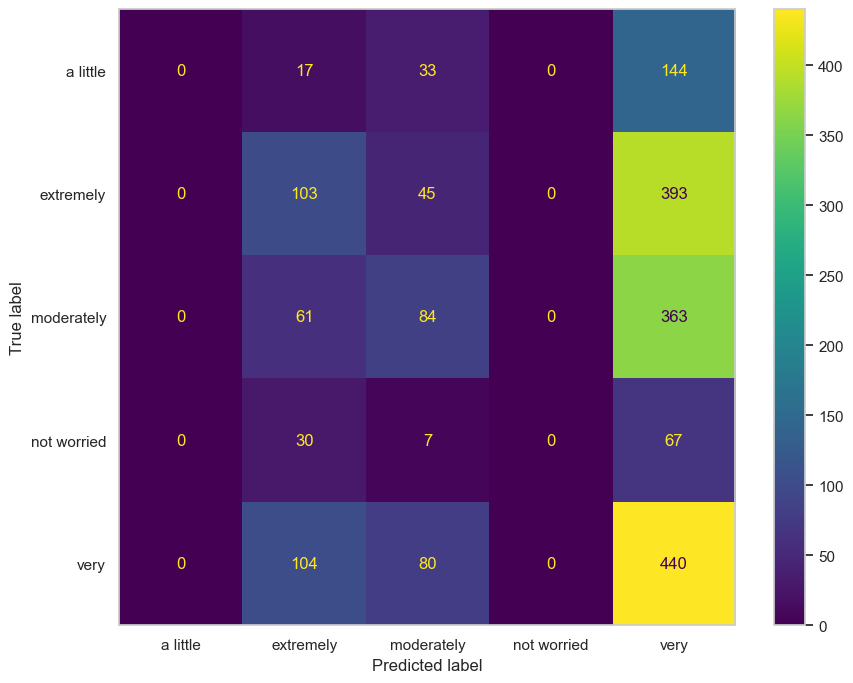

In [46]:
# Ordinal confusion matrix
ordinal_pred = ordinal_logistic.predict(ordinal_X_test)
cm = confusion_matrix(ordinal_y_test, ordinal_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=ordinal_logistic.classes_)
fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax)
plt.grid(False)  # Disable the grid
plt.show()

In [47]:
print(classification_report(ordinal_y_test, ordinal_pred))

              precision    recall  f1-score   support

    a little       0.00      0.00      0.00       194
   extremely       0.33      0.19      0.24       541
  moderately       0.34      0.17      0.22       508
 not worried       0.00      0.00      0.00       104
        very       0.31      0.71      0.43       624

    accuracy                           0.32      1971
   macro avg       0.20      0.21      0.18      1971
weighted avg       0.28      0.32      0.26      1971



/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/math/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_71995/336447444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')


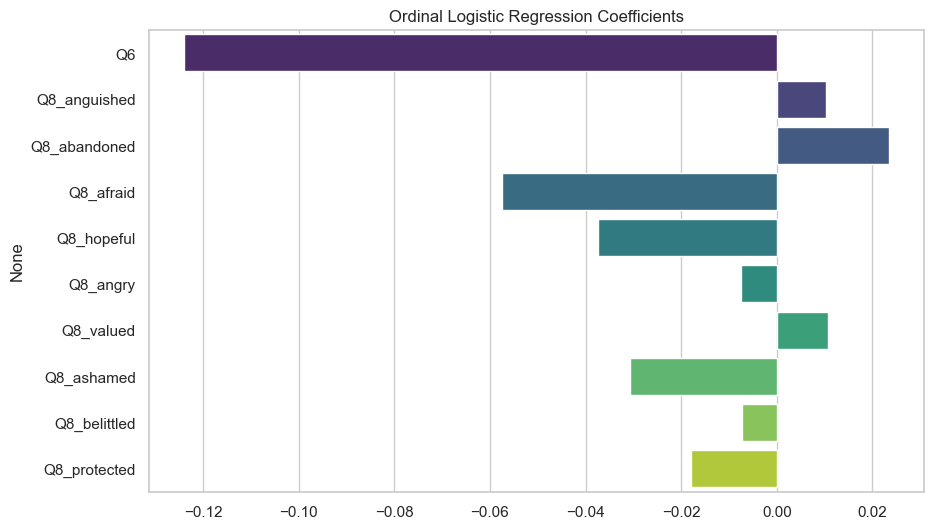

In [48]:
# Plot ordinal logistic regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=ordinal_logistic.coef_[0], y=X_ordinal.columns, palette='viridis')
plt.title('Ordinal Logistic Regression Coefficients')
plt.show()

In [49]:
mod_log = OrderedModel(ordinal_y_train, ordinal_X_train, distr='logit')
res_log = mod_log.fit(method='bfgs')
res_log.summary()

/opt/anaconda3/envs/math/lib/python3.12/site-packages/statsmodels/miscmodels/ordinal_model.py:205: Warning: the endog has ordered == False, risk of capturing a wrong order for the categories. ordered == True preferred.
  warnings.warn("the endog has ordered == False, "


Optimization terminated successfully.
         Current function value: 1.443598
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                     Q1   Log-Likelihood:                -11377.
Model:                   OrderedModel   AIC:                         2.278e+04
Method:            Maximum Likelihood   BIC:                         2.288e+04
Date:                Fri, 06 Dec 2024                                         
Time:                        02:04:05                                         
No. Observations:                7881                                         
Df Residuals:                    7867                                         
Df Model:                          10                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Q6                         0.0416      0.015      2.727      0.006       0.012       0.072
Q8_anguished              -0.0327      0.015     -2.122      0.034      -0.063      -0.002
Q8_abandoned               0.0172      0.015      1.118      0.264      -0.013       0.047
Q8_afraid                  0.0119      0.015      0.803      0.422      -0.017       0.041
Q8_hopeful                 0.0134      0.015      0.880      0.379      -0.016       0.043
Q8_angry                  -0.0175      0.015     -1.168      0.243      -0.047       0.012
Q8_valued                 -0.0340      0.016     -2.098      0.036      -0.066      -0.002
Q8_ashamed                 0.0072      0.015      0.476      0.634      -0.022       0.037
Q8_belittled              -0.0028      0.015     -0.183      0.854      -0.033       0.027
Q8_protected              -0.0141      0.016     -0.876      0.381      -0.046       0.017
a little/extremely        -2.1630      0.062    -35.160      0.000      -2.284      -2.042
extremely/moderately       0.5029      0.020     24.588      0.000       0.463       0.543
moderately/not worried    -0.0046      0.021     -0.223      0.824      -0.045       0.036
not worried/very          -1.5819      0.051    -31.071      0.000      -1.682      -1.482
==========================================================================================
"""

In [50]:
num_of_thresholds = 2
mod_log.transform_threshold_params(res_log.params[-num_of_thresholds:])

array([       -inf, -0.00460601,  0.20097732,         inf])

In [51]:
import statsmodels.api as sm

#
X_train_dummy = pd.get_dummies(X_train, drop_first=True)
X_test_dummy = pd.get_dummies(X_test, drop_first=True)

X_variables = X_train_dummy.columns

#### Model 2: Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred_RF = rf.predict(X_test)
accuracy_score(y_test, y_pred_RF)

0.4490106544901065

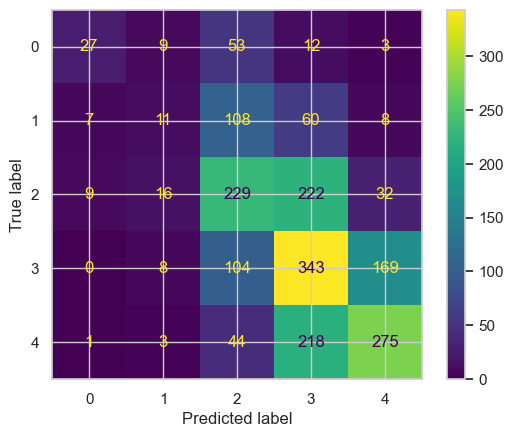

In [54]:
cm = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

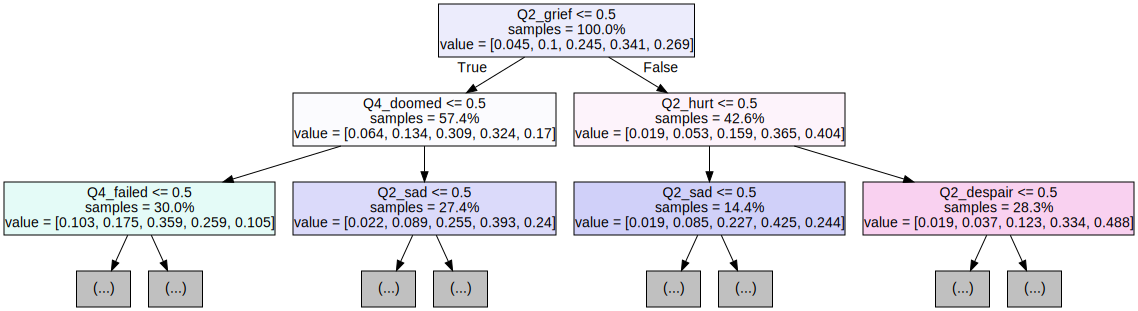

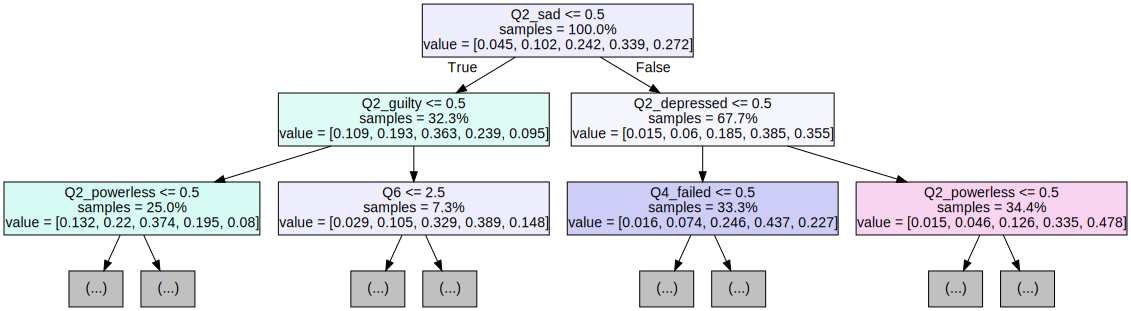

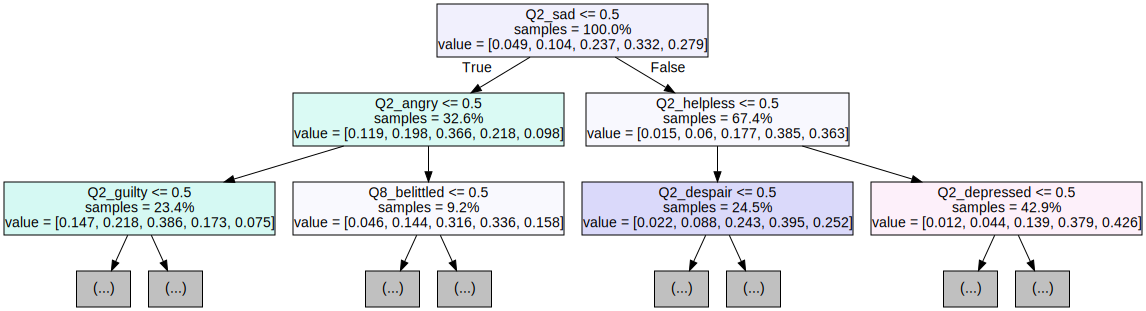

In [55]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [56]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x307441430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x3074dbef0>})

Best hyperparameters: {'max_depth': 10, 'n_estimators': 271}


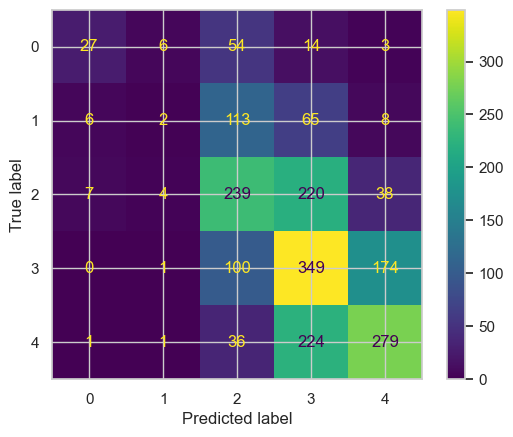

In [57]:
# best model!
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)
cm = confusion_matrix(y_test, best_rf.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [58]:
print(np.mean(y_pred == y_test), np.mean(y_pred != y_test))

0.45865043125317095 0.541349568746829


##### Random Forest (Bagging Classifier)

In [59]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [60]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(X_train, y_train)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(X_test)

oob score = 0.47735059002664637


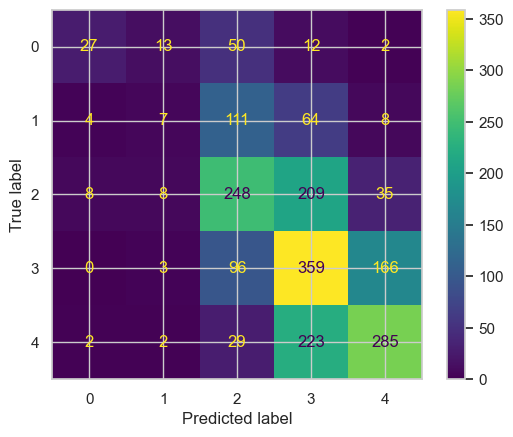

In [61]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [62]:
accuracy_score(y_test, pred)

0.4698122780314561

In [63]:
precision_score(y_test, pred, average='macro')

0.46474911165867383

In [64]:
recall_score(y_test, pred, average='macro')

0.3772019132310514

#### Model 3: Gradient Boosting

In [65]:
gbc = GradientBoostingClassifier()
 
gbc.fit(X_train, y_train)
 
y_pred_gbc = gbc.predict(X_test)

In [66]:
accuracy_score(y_test, y_pred_gbc)

0.48909183155758496

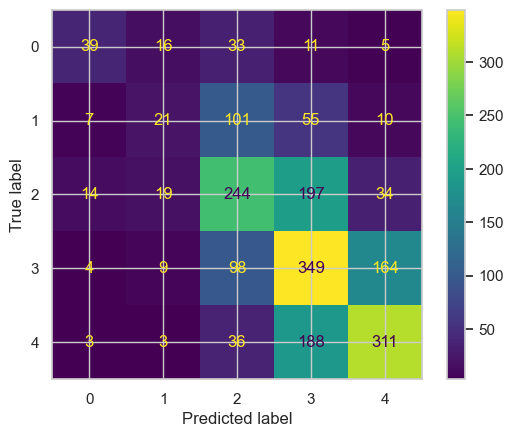

In [67]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot();

In [68]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       104
           1       0.31      0.11      0.16       194
           2       0.48      0.48      0.48       508
           3       0.44      0.56      0.49       624
           4       0.59      0.57      0.58       541

    accuracy                           0.49      1971
   macro avg       0.48      0.42      0.43      1971
weighted avg       0.48      0.49      0.48      1971



NameError: name 'top_n' is not defined

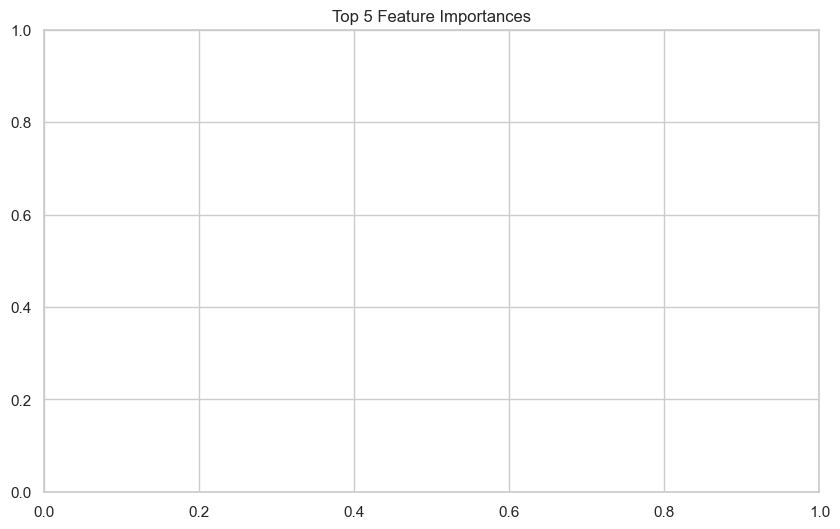

In [69]:

feature_importances_gbc = gbc.feature_importances_
indices_gbc = np.argsort(feature_importances_gbc)[::-1]

feature_names = df.columns
top_feature_names = feature_names[indices_gbc[:3]]
top_feature_importances = feature_importances_gbc[indices_gbc[:3]]

plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.barh(range(top_n), top_feature_importances[::-1], align="center")  
plt.yticks(range(top_n), top_feature_names[::-1])  
plt.xlabel("Feature Importance")
plt.show()


In [ ]:
# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test)

# Evaluate the best model
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

In [ ]:
cv_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

#### Model 4: Neural Network

In [70]:
X

,age,sex,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,Q2_ashamed,...,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected,weight
0,6,0,1,1,1,1,1,1,1,1,...,2,4,4,3,1,3,2,-1,3,73
1,9,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,11
2,8,1,1,1,1,1,0,1,1,1,...,2,2,2,3,2,3,2,2,3,11
3,4,1,0,1,0,0,0,0,1,0,...,2,3,3,3,3,3,3,3,3,68
4,2,1,0,0,0,1,1,0,0,1,...,4,4,4,1,4,1,4,1,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,0,1,1,1,...,4,0,1,0,1,0,1,0,3,29
9996,9,1,1,1,1,1,0,1,0,1,...,0,4,2,0,2,3,0,3,0,38
9997,3,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,64
9998,5,1,1,1,1,1,0,1,1,1,...,0,0,4,2,2,0,4,2,0,56


In [71]:
X_train.dtypes

age                  int8
sex                 int64
Q2_sad               int8
Q2_helpless          int8
Q2_anxious           int8
Q2_afraid            int8
Q2_optimistic        int8
Q2_angry             int8
Q2_guilty            int8
Q2_ashamed           int8
Q2_hurt              int8
Q2_depressed         int8
Q2_despair           int8
Q2_grief             int8
Q2_powerless         int8
Q2_indifferent       int8
Q3                   int8
Q4_hesitant          int8
Q4_doomed            int8
Q4_frightening       int8
Q4_oppotunities      int8
Q4_threatened        int8
Q4_destroyed         int8
Q4_failed            int8
Q5                   int8
Q6                   int8
Q7_concerns          int8
Q7_catastrophe       int8
Q7_distress          int8
Q7_science           int8
Q7_generations       int8
Q7_trusted           int8
Q7_effectiveness     int8
Q7_failing           int8
Q7_betraying         int8
Q8_anguished         int8
Q8_abandoned         int8
Q8_afraid            int8
Q8_hopeful  

In [72]:
# Make y_train and y_test not type category
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [73]:
y_train.dtypes, y_test.dtypes

(dtype('int64'), dtype('int64'))

In [74]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight']) # not the same as the X used in data analysis
y = df['Q1']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64']).columns),
        ('cat', OneHotEncoder(), X_train.select_dtypes(include=['object', 'category']).columns)
    ])

# Create a pipeline with preprocessing and the classifier model 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['sex', 'Q1', 'Q2_sad', 'Q2_helpless', 'Q2_anxious', 'Q2_afraid',
       'Q2_optimistic', 'Q2_angry', 'Q2_guilty', 'Q2_ashamed', 'Q2_hurt',
       'Q2_depressed', 'Q2_despair', 'Q2_grief', 'Q2_powerless',
       'Q2_indifferent', 'Q3', 'Q4_...
       'Q4_oppotunities', 'Q4_threatened', 'Q4_destroyed', 'Q4_failed', 'Q5',
       'Q6', 'Q7_concerns', 'Q7_catastrophe', 'Q7_distress', 'Q7_science',
       'Q7_generations', 'Q7_trusted', 'Q7_effectiveness', 'Q7_failing',
       'Q7_betraying', 'Q8_anguished', 'Q8_abandoned', 'Q8_afraid',
       'Q8_hopeful', 'Q8_angry', 'Q8_valued', 'Q8_ashamed', 'Q8_belittled',
       'Q8_protected'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [77]:
# Predict the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    a little       1.00      1.00      1.00       194
   extremely       1.00      1.00      1.00       541
  moderately       1.00      1.00      1.00       508
 not worried       1.00      1.00      1.00       104
        very       1.00      1.00      1.00       624

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



In [79]:
# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
# Train the model with the best parameters
best_pipeline = grid_search.best_estimator_
y_pred_best = best_pipeline.predict(X_test)

# Evaluate the best model
print(f'Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Cross-validation Accuracy: 1.0000 ± 0.0000
Best Hyperparameters: {'classifier__max_depth': 7, 'classifier__n_estimators': 200}
Best Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    a little       1.00      1.00      1.00       194
   extremely       1.00      1.00      1.00       541
  moderately       1.00      1.00      1.00       508
 not worried       1.00      1.00      1.00       104
        very       1.00      1.00      1.00       624

    accuracy                           1.00      1971
   macro avg       1.00      1.00      1.00      1971
weighted avg       1.00      1.00      1.00      1971



In [80]:
from prince import MCA

In [82]:
X = df.drop(columns=['Repondent_Serial', 'language', 'country', 'country:region', 'yyyymmdd', 'AgeGender', 'region', 'weight']) # not the same as the X used in data analysis
y = df['Q1']

In [83]:
# Change the sex column to be binary (0 or 1)
X['sex'] = [0 if sex == 'man' else 1 for sex in df['sex']]

#change yes/no questions to be binary (0 = no, 1 = yes?)
for column in X.columns:
    if X[column].unique().size == 2:
        X[column] = [0 if value == X[column].unique()[0] else 1 for value in X[column]]
    else:
        X[column] = X[column].astype('category').cat.codes

X

,age,sex,Q1,Q2_sad,Q2_helpless,Q2_anxious,Q2_afraid,Q2_optimistic,Q2_angry,Q2_guilty,...,Q7_betraying,Q8_anguished,Q8_abandoned,Q8_afraid,Q8_hopeful,Q8_angry,Q8_valued,Q8_ashamed,Q8_belittled,Q8_protected
0,6,0,1,1,1,1,1,1,1,1,...,0,2,4,4,3,1,3,2,-1,3
1,9,1,1,1,1,1,1,1,1,1,...,1,2,2,2,2,2,2,2,2,2
2,8,1,1,1,1,1,1,0,1,1,...,1,2,2,2,3,2,3,2,2,3
3,4,1,0,0,1,0,0,0,0,1,...,-1,2,3,3,3,3,3,3,3,3
4,2,1,1,0,0,0,1,1,0,0,...,1,4,4,4,1,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,1,1,1,1,0,1,1,...,1,4,0,1,0,1,0,1,0,3
9996,9,1,4,1,1,1,1,0,1,0,...,0,0,4,2,0,2,3,0,3,0
9997,3,1,1,1,1,1,1,1,1,1,...,1,3,3,3,3,3,3,3,3,3
9998,5,1,4,1,1,1,1,0,1,1,...,1,0,0,4,2,2,0,4,2,0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [94]:
# Make a tensorflow model to predict Q1
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/50


/opt/anaconda3/envs/math/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4815 - loss: 1.2671 - val_accuracy: 0.8358 - val_loss: 0.4664
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.7843 - loss: 0.5810 - val_accuracy: 0.9271 - val_loss: 0.2244
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8648 - loss: 0.3749 - val_accuracy: 0.9613 - val_loss: 0.1299
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9055 - loss: 0.2587 - val_accuracy: 0.9683 - val_loss: 0.1032
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9244 - loss: 0.2079 - val_accuracy: 0.9778 - val_loss: 0.0608
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9412 - loss: 0.1627 - val_accuracy: 0.9765 - val_loss: 0.0587
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9514 - loss: 0.1456 - val_accuracy: 0.9765 - val_loss: 0.0555
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.9563 - loss: 0.1222 - val_accuracy:

[0.016142480075359344, 0.9964485168457031]

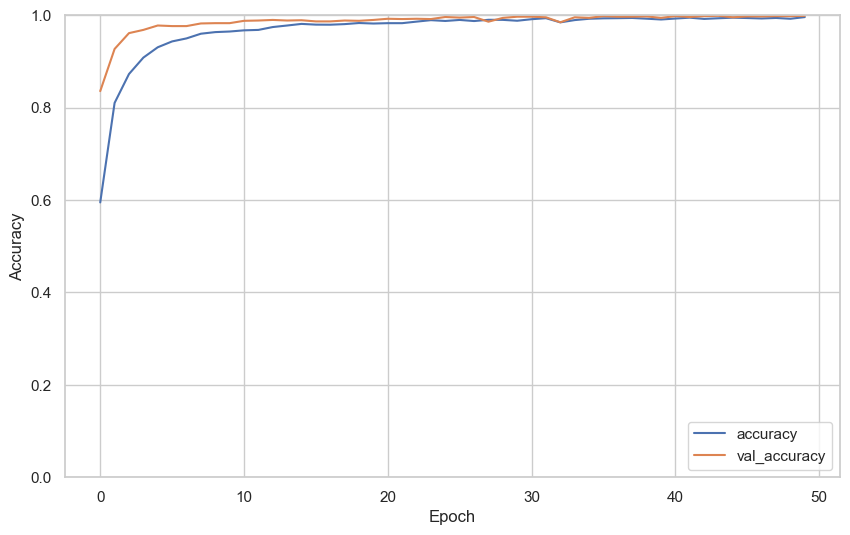

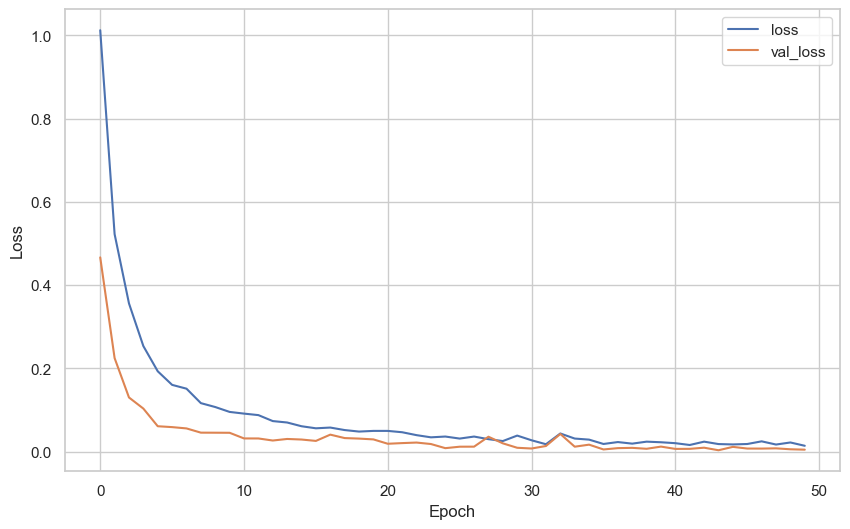

In [95]:
# Accuracy and error plots
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()